In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("Biomechanical features of orthopedic patients/column_2C_weka.csv")
data.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [16]:
data1 = data[data['class'] == 'Abnormal']
x = np.array(data1.loc[:, 'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:, 'sacral_slope']).reshape(-1,1)

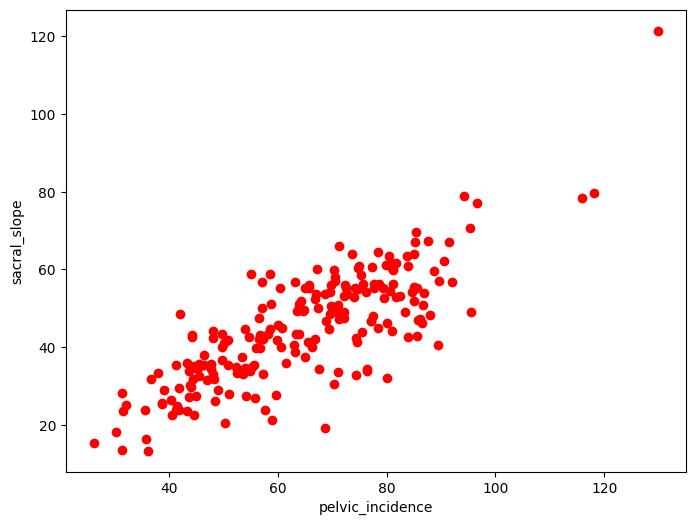

In [20]:
plt.figure(figsize=[8,6])
plt.scatter(x=x, y=y, color="red")
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()

In [21]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [22]:
predict_space = np.linspace(min(x), max(x)).reshape(-1, 1)

In [23]:
linear_reg.fit(x, y)

LinearRegression()

In [24]:
predicted = linear_reg.predict(predict_space)

In [26]:
# r_square R^2
print('R^2 score: ', linear_reg.score(x, y))

R^2 score:  0.6458410481075871


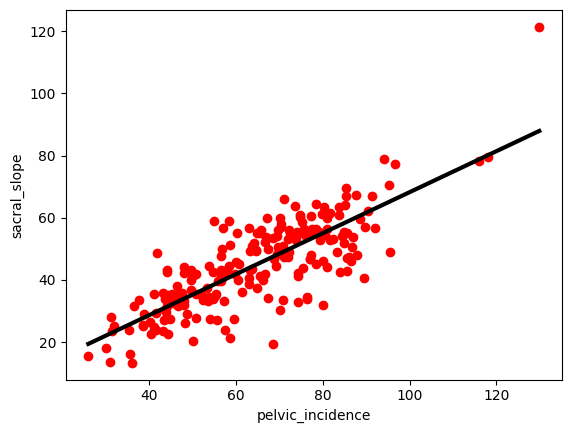

In [30]:
plt.plot(predict_space, predicted, color="black", linewidth=3)
plt.scatter(x=x, y=y, color="red")
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5

In [32]:
cv_result = cross_val_score(reg, x, y, cv=k)

In [33]:
print('CV Scores: ', cv_result)
print('CV Scores Average: ', np.sum(cv_result/k))

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV Scores Average:  0.3931462502884868


# Regularized Regression
Linear Regression özelliklerden birinin önemli olduğunu düşünürse, bu özelliğe yüksek katsayı verir.
Ancak bu, KNN'de ezberlemeye benzer olan overfitting'e sebep olabilir. Bu nedenle Regularized Regression kullanılır.

#### Ridge regression:

In [39]:
#Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.3)

In [42]:
# alpha KNN'de k parametresine benzer. en iyi doğruluk ve model karmaşıklığı için seçmemiz gereken hiperparametredir.
ridge = Ridge(alpha= 0.1) 
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [44]:
ridge_predict = ridge.predict(x_test)
print("Ridge score: ", ridge.score(x_test, y_test))

Ridge score:  0.5732611808361024


#### Lasso regression:
Verilerin önemli özelliklerini seçmek için kullanılabilir.

In [54]:
data1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [55]:
#Lasso
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:, ["pelvic_incidence", "pelvic_tilt numeric","lumbar_lordosis_angle","pelvic_radius"]])
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3, test_size=0.3)
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [56]:
l_predict = lasso.predict(x_test)
print("Lasso score: ", lasso.score(x_test, y_test))
print("Lasso coefficients: ", lasso.coef_)

Lasso score:  0.9999985469460118
Lasso coefficients:  [ 9.98901381e-01 -9.98137804e-01  3.13359061e-05 -0.00000000e+00]


##### Accuracy model seçiminin ölçümü için yeterli midir?
##### Örneğin %95 normal ve %5 anormal örneklem içeren bir veri var ve modelimiz ölçüm metriği için accuracy kullanıyor.
##### O zaman model tüm örnekler için %100 normal tahmin eder ve acc %95'tir ancak tüm anormal örnekleri yanlış sınıflandırır.
##### Bu nedenle dengesizlik verilerinde model ölçüm matrisi olarak confusion matrix kullanmamız gerekir.
##### Confusion matrix kullanırken, sınıflandırma yöntemlerini çeşitlendirmek için random forest sınıflandırıcısının kullanılmasına izin verir.

In [66]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

x,y = data.loc[:, data.columns != 'class'], data.loc[:, 'class']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =1)
random_forest = RandomForestClassifier(random_state = 4)
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=4)

In [70]:
y_pred = random_forest.predict(x_test)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", confusion)
print("\nClassification report: \n", classification_report(y_test, y_pred))

Confusion matrix: 
 [[60  6]
 [ 8 19]]

Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



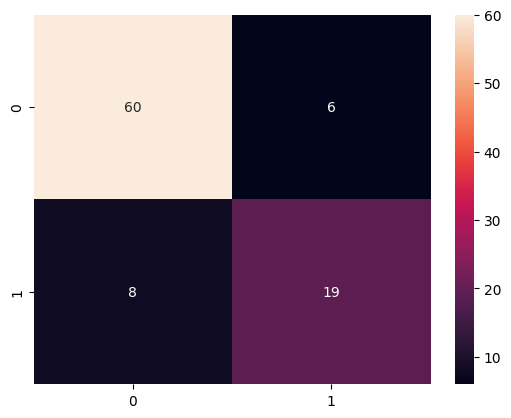

In [71]:
import seaborn as sns
sns.heatmap(confusion, annot=True, fmt="d")
plt.show()